# dogs vs cats classifier using CNN

In [1]:
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import os

In [2]:
Image_width = 128
Image_height = 128
Image_size = (Image_width,Image_height)
Image_channels = 3

In [3]:
# 1 for dog and 0 for cat
filenames = os.listdir('C://Users//Nishant//Documents//Datasets//cats and dogs//train')
categories = []

for f_name in filenames:
    category = f_name.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
df = pd.DataFrame({'filename': filenames,'category': categories})
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,\
    Dropout,Flatten,Dense,Activation,\
    BatchNormalization

In [5]:
model = Sequential()
# conv layer 1
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (Image_width,Image_height,Image_channels)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# conv layer 2
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# conv layer 3
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 1 input layer, 1 hidden and 1 output layer
model.add(Flatten()) # also is considered 1 st input layer
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [7]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience= 2,
                                           verbose = 1, factor = 0.5, min_lr= 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [8]:
df['category'] = df['category'].replace({0:'cats',1:'dogs'})
train_df,validate_df = train_test_split(df,test_size = 0.20,random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

In [9]:
print(validate_df)

           filename category
0       cat.493.jpg     cats
1      dog.9112.jpg     dogs
2       cat.745.jpg     cats
3     dog.11022.jpg     dogs
4     dog.11363.jpg     dogs
...             ...      ...
4995   cat.6551.jpg     cats
4996   cat.9403.jpg     cats
4997    cat.236.jpg     cats
4998   dog.6530.jpg     dogs
4999  cat.10622.jpg     cats

[5000 rows x 2 columns]


In [10]:
train_datagen = ImageDataGenerator( rotation_range= 15, rescale= 1./255,
                                   shear_range= 0.1, zoom_range= 0.1,
                                   horizontal_flip= True,width_shift_range= 0.1
                                  , height_shift_range= 0.1)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                   "C://Users//Nishant//Documents//Datasets//cats and dogs//train", 
                                                   x_col ='filename',
                                                   y_col = 'category',
                                                   target_size = Image_size,
                                                   batch_size = batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                   "C://Users//Nishant//Documents//Datasets//cats and dogs//train",
                                                   x_col = 'filename',
                                                   y_col = 'category',
                                                   target_size = Image_size,
                                                    class_mode ='categorical',
                                                   batch_size = batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [12]:
# now training process starts

#epochs ?? 1 epoch can have many batches and at the end of epoch the accuracy will
# be calculated
#epochs = 10
#model.fit_generator(train_generator,
#                   epochs=epochs,
#                   validation_data=validation_generator,
#                   validation_steps=total_validate//batch_size,
#                   steps_per_epoch=total_train//batch_size,
#                   callbacks = callbacks)

In [13]:
#model.save("dogs_vs_cats.h5")

In [19]:
import h5py
import keras
from keras.models import load_model
import tensorflow as tf 
model = tf.keras.models.load_model('C:/Users/Nishant/Documents/Datasets/cats and dogs/model1_catsVSdogs_10epoch.h5')
#from keras.utils import CustomObjectScope
#from keras.initializers import glorot_uniform

#with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
#model = load_model("C:/Users/Nishant/Documents/Datasets/cats and dogs/model1_catsVSdogs_10epoch.h5")

In [16]:
test_filenames = os.listdir('C://Users//Nishant//Documents//Datasets//cats and dogs//test1')
test_df = pd.DataFrame({
    'filename': test_filenames
})
idlist=[]
for file in test_df['filename']:
    idlist.append(file.split(".")[0])
nb_samples = test_df.shape[0]

In [31]:
#print(idlist)

In [17]:
test_datagen = ImageDataGenerator( rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                   "C://Users//Nishant//Documents//Datasets//cats and dogs//test1",
                                                x_col = 'filename',
                                                   y_col = None,
                                                   class_mode = None,
                                                   target_size = Image_size,
                                                   batch_size = batch_size)

Found 12500 validated image filenames.


In [19]:
predict = model.predict_generator(test_generator, steps =np.ceil(nb_samples/batch_size))

C:\Users\Nishant\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [20]:
test_df['category'] = np.argmax(predict, axis = 1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({1:'dog',0: 'cat'})

In [21]:
print(test_df)

        filename category
0          1.jpg     dogs
1         10.jpg     cats
2        100.jpg     dogs
3       1000.jpg     cats
4      10000.jpg     dogs
...          ...      ...
12495   9995.jpg     cats
12496   9996.jpg     cats
12497   9997.jpg     cats
12498   9998.jpg     cats
12499   9999.jpg     dogs

[12500 rows x 2 columns]


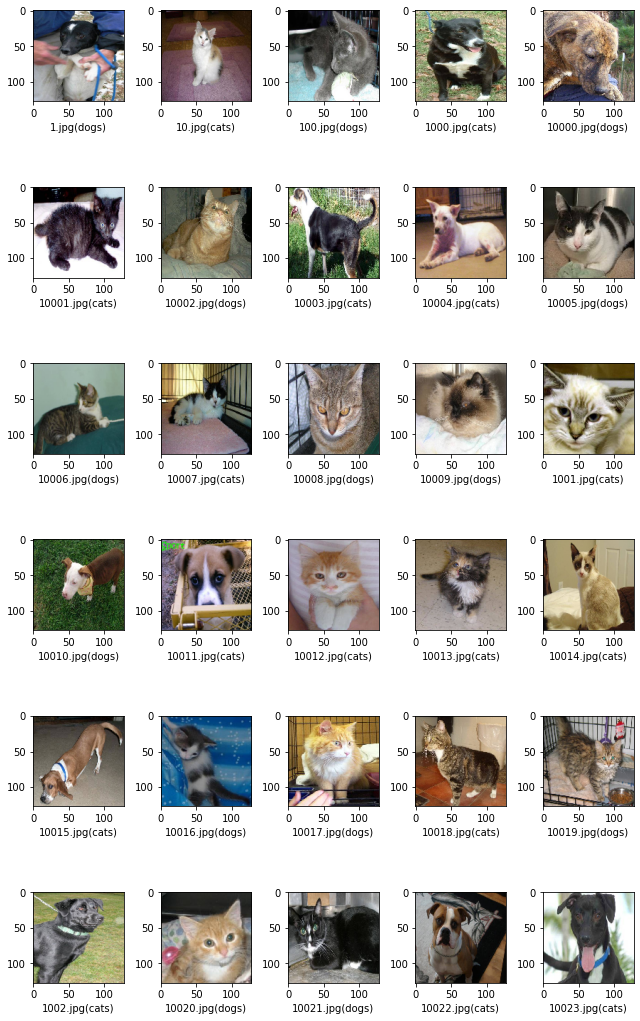

In [23]:
sample_test = test_df.head(30)
sample_test.head()

plt.figure(figsize = (9,15))
for index,row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C://Users//Nishant//Documents//Datasets//cats and dogs//test1//" + filename,target_size=Image_size)
    plt.subplot(6,5,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category)+')')
plt.tight_layout()
plt.show()